# Standard Analysis

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

from oandaapi import get_exrate_as_df, get_exrate_USD

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Dataset

Used four USD based currency exchange rates as follows:

- EUR/USD
- JPY/USD
- CAD/USD
- AUD/USD

100 days to 03/01/2019

In [2]:
currencies = ['EUR',  'JPY', 'CAD', 'AUD']

In [3]:
dfs = {
    currency+'_USD' : get_exrate_USD(pair=currency, to='2019-03-01', count=100) 
    for currency in currencies
}

In [27]:
closing_df = pd.DataFrame()
for currency in currencies:
    closing_df[currency+'_USD'] = dfs[currency+'_USD']['close']
closing_df
closing_df.tail()

,EUR_USD,JPY_USD,CAD_USD,AUD_USD
time,,,,
2019-02-24 22:00:00,1.13574,0.009004,0.758300,0.71680
2019-02-25 22:00:00,1.13892,0.009043,0.759336,0.71874
2019-02-26 22:00:00,1.13695,0.009009,0.760109,0.71404
2019-02-27 22:00:00,1.13706,0.008978,0.759036,0.70940
2019-02-28 22:00:00,1.13648,0.008936,0.751998,0.70802


In [31]:
returns_df = closing_df.pct_change().dropna()

## Pearson Colerations

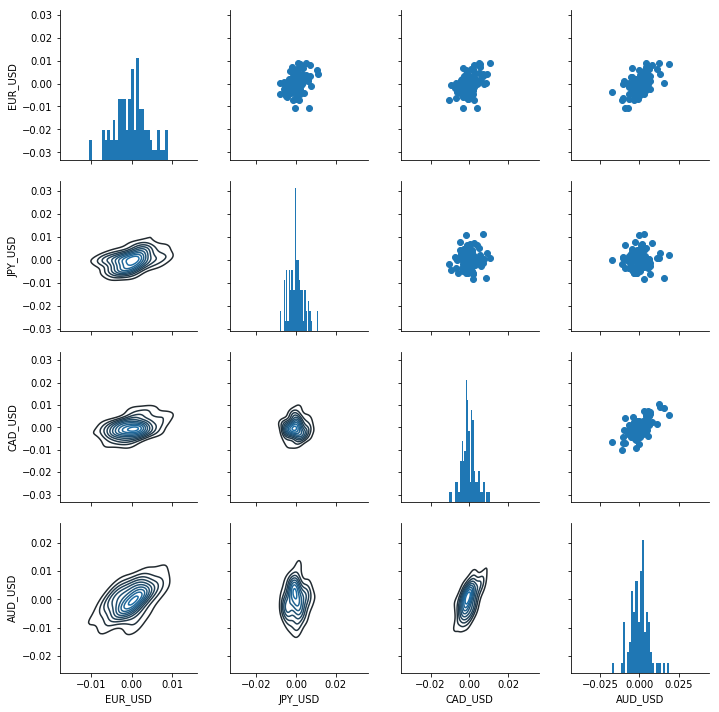

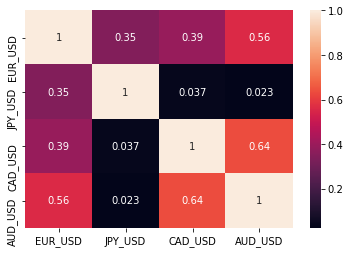

In [32]:
returns_fig = sns.PairGrid(returns_df)

returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot)
returns_fig.map_diag(plt.hist,bins=30)

plt.show()

sns.heatmap(returns_df.corr(), annot=True)
plt.show()

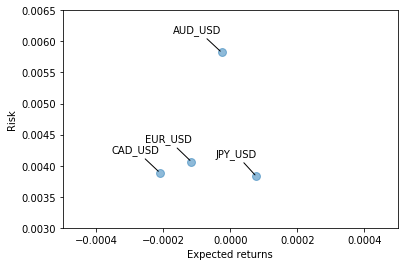

In [33]:
area = np.pi*20

plt.scatter(returns_df.mean(), returns_df.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0005,0.0005])
plt.ylim([0.003,0.0065])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# グラフにアノテーションを付けます。詳しくは、以下を参照してみてください。
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, 20),
        textcoords = 'offset points', ha = 'right',
        arrowprops = dict(arrowstyle='-', connectionstyle= 'arc3'))
plt.show()

In [34]:
currency_pairs = [currency+'_USD' for currency in currencies]

## Value at Risk

In [35]:
PARCENTILE = 0.05
for currency_pair in currency_pairs:
    print('VaR of', currency_pair, ':', returns_df[currency_pair].quantile())

VaR of EUR_USD : -2.615815218809381e-05
VaR of JPY_USD : -4.426541543089968e-05
VaR of CAD_USD : -0.0007384745226288736
VaR of AUD_USD : -0.00012661077035625024


### Monte Carlo Simulation